# Final Project - Salary prediction

**The key tasks:**
1. Select a dataset & define problem
2. Select evaluation metric
3. Explore dataset (EDA)
4. Evaluate different algorithms and select the best choice
5. Conclude


**Dataset:  This dataset was taken from 1212.mn National statistics office (http://web.nso.mn/nadamn/index.php/catalog/257/datafile/F4). The survey was taken in 2019 with 72 columns and 13000 rows. The survey was about time usage study including salary. The survey data was already encoded and was in mongolian which means, i had to decode to show some variables on EDA. In this project, I will try to predict Main salary and if possible, side job salary based on time usage such as hours worked last week, hours spent using phone etc. and type of business they work in. Hopefully, this problem set will be useful for employers and data scientists **

Key features used:
- `HL1`: information number (which station)
- `HL3`: Relation to the househead
- `HL4`: Gender
- `HL6`: Age
- `HL8`: Time spent watching TV, last 24 hours
- `HL10`: Time spent using phone, last 24 hours
- `ED1`: School status
- `ED2`: Reason for dropping school
- `ED3`: Highest degree achieved
- `HE3`: Hearing problem
- `MS2`: Marital status
- `EP8`: Employment status
- `EP10C`: Hours worked last week
- `EP11A`: Main job salary per month (unit: 1000 tugriks)
- `EP11B`: Side job salary per month (unit: 1000 tugriks)

**Determining the evaluation metrics.**


Prediction on salary will be evaluated using Root Mean Squeared Error (RMSE) since the models used in are Regressions. Therefore, based on the y data distribution and Std, my benchmark was around 350000 tugriks.

### Importing libraries and data

In [385]:
import numpy as np
import pandas as pd
import pyreadstat

In [386]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] =  (12, 8)

In [387]:
df, meta = pyreadstat.read_sav('hl [mn].sav')

In [388]:
df.head()

,HH2,HH3,HL1,HL3,HL4,HL5Y,HL5M,HL5D,HL6,HL7,...,EP11A,EP11B,EP12,EP13,EP14,EP15,EP16,HH16,hhweight,pweight
0,1.00000,1.00000,1.00000,1.00000,1.00000,1952.00000,5.00000,22.00000,66.00000,1.00000,...,NaN,NaN,1.00000,2.00000,7.00000,2.00000,2.00000,1.00000,0.56681,0.54713
1,1.00000,1.00000,2.00000,9.00000,2.00000,2006.00000,4.00000,30.00000,12.00000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.56681,0.54713
2,1.00000,2.00000,1.00000,1.00000,1.00000,1985.00000,3.00000,29.00000,33.00000,1.00000,...,850.00000,0.00000,1.00000,NaN,NaN,NaN,NaN,1.00000,0.56681,0.54713
3,1.00000,2.00000,2.00000,2.00000,2.00000,1987.00000,10.00000,9.00000,31.00000,1.00000,...,NaN,NaN,1.00000,1.00000,NaN,1.00000,NaN,1.00000,0.56681,0.54713
4,1.00000,2.00000,3.00000,3.00000,2.00000,2014.00000,6.00000,16.00000,4.00000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.56681,0.54713


In [389]:
df_graph = df

##### Dropping unnecessary columns and renaming

In [390]:
df = df.drop(["HH2","HH3","HL5M","HL5D","HL5Y","HL9","HL7","HL11","HL13A","HL13B","HL13C","HL13D","HL13E","HL13F","HL13G","HL14","HL15A","HL15B","HL15C","HL15D","HL15E","HL16","HL17","HL18","HL20","HL19","HL21","ED2","HE1","HE2","HE4","HE5","HE6","HE7","HE8","MS1","MS3","MS4","MS5","EP1","EP2","EP3","EP4","EP5","EP6_iscocode","EP7_isiccode","EP9","EP10B","EP10A","EP12","EP13","EP14","EP15","EP16","HH16","hhweight","pweight","HL12"],axis = 1)
df_graph = df_graph.drop(["HH2","HH3","HL5M","HL5D","HL5Y","HL9","HL7","HL11","HL13A","HL13B","HL13C","HL13D","HL13E","HL13F","HL13G","HL14","HL15A","HL15B","HL15C","HL15D","HL15E","HL16","HL17","HL18","HL20","HL19","HL21","HE1","HE2","HE4","HE5","HE6","HE7","HE8","MS1","MS3","MS4","MS5","EP1","EP2","EP3","EP4","EP5","EP6_iscocode","EP7_isiccode","EP9","EP10B","EP10A","EP12","EP13","EP14","EP15","EP16","HH16","hhweight","pweight","HL12"],axis = 1)

In [391]:
df_graph = df_graph.rename(columns={'HL3': 'Househead', 'HL4': 'gender','HL6': 'age','HL8': 'TV usage','HL10':'Phone usage','ED1':'Education status','ED3':'Degree','HE3':'Hearing problem','MS2':'Marital status','EP8':'Employment status','EP10C':'Hours worked last week','EP11A':'Main salary','EP11B':'Side salary','ED2':'Reason to drop'})
df = df.rename(columns={'HL3': 'Househead', 'HL4': 'gender','HL6': 'age','HL8': 'TV usage','HL10':'Phone usage','ED1':'Education status','ED3':'Degree','HE3':'Hearing problem','MS2':'Marital status','EP8':'Employment status','EP10C':'Hours worked last week','EP11A':'Main salary','EP11B':'Side salary'})

## EDA

In [474]:
df_graph.head()

,HL1,Househead,gender,age,TV usage,Phone usage,Education status,Reason to drop,Degree,Hearing problem,Marital status,Employment status,Hours worked last week,Main salary,Side salary
0,1.00000,Househead,male,66.00000,5.00000,NaN,graduated,NaN,technical school,false,widow/widower,NaN,NaN,NaN,NaN
1,2.00000,Grandchild,female,12.00000,3.00000,2.00000,studying,NaN,elementary,false,NaN,NaN,NaN,NaN,NaN
2,1.00000,Househead,male,33.00000,2.00000,2.00000,graduated,NaN,technical school,false,"Married, certified",Full-time,40.00000,850000.00000,0.00000
3,2.00000,Spouse,female,31.00000,6.00000,4.00000,graduated,NaN,middle school,false,"Married, certified",NaN,NaN,NaN,NaN
4,3.00000,Child,female,4.00000,3.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [393]:
df_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13499 entries, 0 to 13498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HL1                     13499 non-null  float64
 1   Househead               13499 non-null  float64
 2   gender                  13499 non-null  float64
 3   age                     13499 non-null  float64
 4   TV usage                9955 non-null   float64
 5   Phone usage             6992 non-null   float64
 6   Education status        9820 non-null   float64
 7   Reason to drop          754 non-null    float64
 8   Degree                  9820 non-null   float64
 9   Hearing problem         9820 non-null   float64
 10  Marital status          9164 non-null   float64
 11  Employment status       5660 non-null   float64
 12  Hours worked last week  5660 non-null   float64
 13  Main salary             5657 non-null   float64
 14  Side salary             5657 non-null 

In [394]:
df_graph.describe()

,HL1,Househead,gender,age,TV usage,Phone usage,Education status,Reason to drop,Degree,Hearing problem,Marital status,Employment status,Hours worked last week,Main salary,Side salary
count,13499.00000,13499.00000,13499.00000,13499.00000,9955.00000,6992.00000,9820.00000,754.00000,9820.00000,9820.00000,9164.00000,5660.00000,5660.00000,5657.00000,5657.00000
mean,2.60508,2.51478,1.50574,29.61545,3.50949,2.58810,1.90560,5.79841,4.43401,1.94002,2.22250,4.99788,52.70141,587.90331,4.74545
std,1.51193,1.69000,0.49999,20.69114,2.12039,2.00556,0.54097,10.77793,2.12757,0.23746,1.33020,4.02664,20.50665,625.44856,84.62468
min,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000
25%,1.00000,1.00000,1.00000,11.00000,2.00000,1.00000,2.00000,4.00000,3.00000,2.00000,1.00000,1.00000,40.00000,250.00000,0.00000
50%,2.00000,3.00000,2.00000,29.00000,3.00000,2.00000,2.00000,4.00000,4.00000,2.00000,2.00000,2.00000,50.00000,500.00000,0.00000
75%,4.00000,3.00000,2.00000,45.00000,5.00000,3.00000,2.00000,4.00000,6.00000,2.00000,2.00000,9.00000,70.00000,750.00000,0.00000
max,11.00000,11.00000,2.00000,95.00000,15.00000,15.00000,4.00000,96.00000,10.00000,2.00000,6.00000,10.00000,126.00000,9000.00000,5000.00000


##### Scatter matrix

array([[<AxesSubplot:xlabel='Degree', ylabel='Degree'>,
        <AxesSubplot:xlabel='Employment status', ylabel='Degree'>,
        <AxesSubplot:xlabel='Hours worked last week', ylabel='Degree'>,
        <AxesSubplot:xlabel='gender', ylabel='Degree'>,
        <AxesSubplot:xlabel='Main salary', ylabel='Degree'>,
        <AxesSubplot:xlabel='Side salary', ylabel='Degree'>],
       [<AxesSubplot:xlabel='Degree', ylabel='Employment status'>,
        <AxesSubplot:xlabel='Employment status', ylabel='Employment status'>,
        <AxesSubplot:xlabel='Hours worked last week', ylabel='Employment status'>,
        <AxesSubplot:xlabel='gender', ylabel='Employment status'>,
        <AxesSubplot:xlabel='Main salary', ylabel='Employment status'>,
        <AxesSubplot:xlabel='Side salary', ylabel='Employment status'>],
       [<AxesSubplot:xlabel='Degree', ylabel='Hours worked last week'>,
        <AxesSubplot:xlabel='Employment status', ylabel='Hours worked last week'>,
        <AxesSubplot:xlabel='Ho

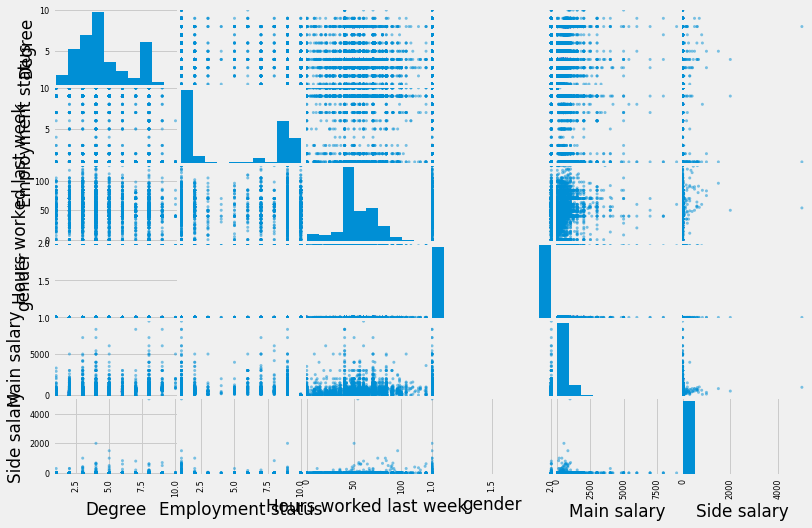

In [395]:
attributes = ["Degree", "Employment status", "Hours worked last week", "gender","Main salary","Side salary"]
scatter_matrix(df_graph[attributes], figsize=(12, 8))

##### Histograms

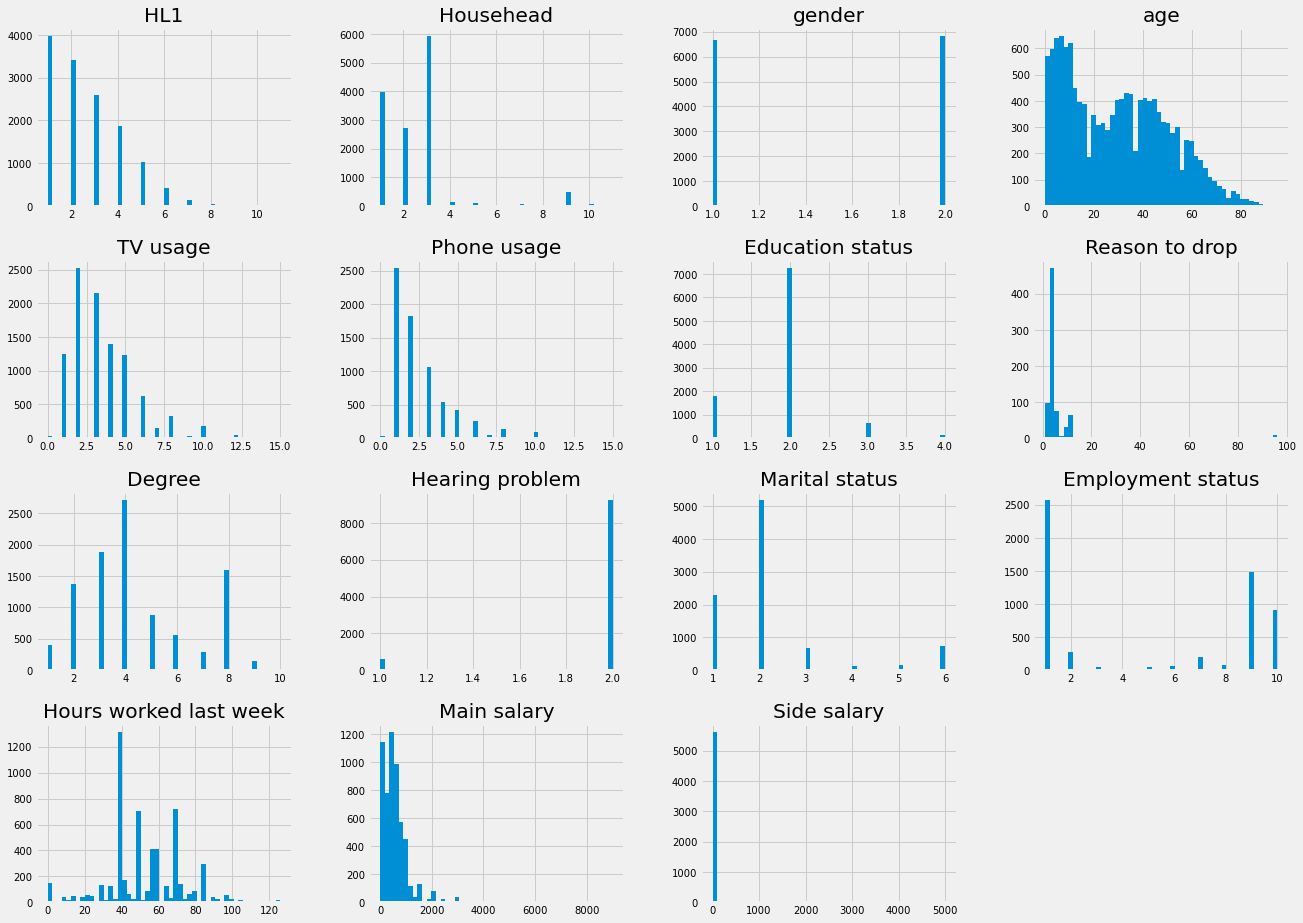

In [396]:
df_graph.hist(bins=50, figsize=(20,15))
plt.show()

##### Replacing numbers by its codename (Decoding). Data was in number format. Therefore, to visualize and explain the data, I had to assign names to those codes from 1212.mn

In [397]:
df_graph['Househead'] = df_graph['Househead'].replace(1, 'Househead')
df_graph['Househead'] = df_graph['Househead'].replace(2, 'Spouse')
df_graph['Househead'] = df_graph['Househead'].replace(3, 'Child')
df_graph['Househead'] = df_graph['Househead'].replace(4, 'Parent')
df_graph['Househead'] = df_graph['Househead'].replace(5, 'brother/sister')
df_graph['Househead'] = df_graph['Househead'].replace(6, 'parent-in-law')
df_graph['Househead'] = df_graph['Househead'].replace(7, 'Child-in-law')
df_graph['Househead'] = df_graph['Househead'].replace(8, 'Grandparent')
df_graph['Househead'] = df_graph['Househead'].replace(9, 'Grandchild')
df_graph['Househead'] = df_graph['Househead'].replace(10, 'Other')
df_graph['Househead'] = df_graph['Househead'].replace(11, 'Non-related')

In [398]:
df_graph['gender'] = df_graph['gender'].replace(1, 'male')
df_graph['gender'] = df_graph['gender'].replace(2, 'female')

In [399]:
df_graph['Education status'] = df_graph['Education status'].replace(1, 'studying')
df_graph['Education status'] = df_graph['Education status'].replace(2, 'graduated')
df_graph['Education status'] = df_graph['Education status'].replace(3, 'dropped')
df_graph['Education status'] = df_graph['Education status'].replace(4, 'unattended')

In [400]:
df_graph['Degree'] = df_graph['Degree'].replace(1, 'no degree')
df_graph['Degree'] = df_graph['Degree'].replace(2, 'elementary')
df_graph['Degree'] = df_graph['Degree'].replace(3, 'middle school')
df_graph['Degree'] = df_graph['Degree'].replace(4, 'highschool')
df_graph['Degree'] = df_graph['Degree'].replace(5, 'technical school')
df_graph['Degree'] = df_graph['Degree'].replace(6, 'specialized technical')
df_graph['Degree'] = df_graph['Degree'].replace(7, 'Diploma')
df_graph['Degree'] = df_graph['Degree'].replace(8, 'Bachelor')
df_graph['Degree'] = df_graph['Degree'].replace(9, 'Magister')
df_graph['Degree'] = df_graph['Degree'].replace(10, 'Doctorate')

In [401]:
df_graph['Hearing problem'] = df_graph['Hearing problem'].replace(1, 'true')
df_graph['Hearing problem'] = df_graph['Hearing problem'].replace(2, 'false')

In [402]:
df_graph['Marital status'] = df_graph['Marital status'].replace(1, 'No relationship')
df_graph['Marital status'] = df_graph['Marital status'].replace(2, 'Married, certified')
df_graph['Marital status'] = df_graph['Marital status'].replace(3, 'Married, uncertified')
df_graph['Marital status'] = df_graph['Marital status'].replace(4, 'Separated')
df_graph['Marital status'] = df_graph['Marital status'].replace(5, 'Broke up')
df_graph['Marital status'] = df_graph['Marital status'].replace(6, 'widow/widower')

In [403]:
df_graph['Employment status'] = df_graph['Employment status'].replace(1, 'Full-time')
df_graph['Employment status'] = df_graph['Employment status'].replace(2, 'half time')
df_graph['Employment status'] = df_graph['Employment status'].replace(3, 'occasional')
df_graph['Employment status'] = df_graph['Employment status'].replace(4, 'intern')
df_graph['Employment status'] = df_graph['Employment status'].replace(5, 'Chief contractor')
df_graph['Employment status'] = df_graph['Employment status'].replace(6, 'intermediary')
df_graph['Employment status'] = df_graph['Employment status'].replace(7, 'Family intermediary')
df_graph['Employment status'] = df_graph['Employment status'].replace(8, 'small business')
df_graph['Employment status'] = df_graph['Employment status'].replace(9, 'family business')
df_graph['Employment status'] = df_graph['Employment status'].replace(10, 'family member')

In [404]:
df_graph['Reason to drop'] = df_graph['Reason to drop'].replace(1, 'not interested')
df_graph['Reason to drop'] = df_graph['Reason to drop'].replace(2, 'Financial problem')
df_graph['Reason to drop'] = df_graph['Reason to drop'].replace(3, 'to work')
df_graph['Reason to drop'] = df_graph['Reason to drop'].replace(4, 'Herding')
df_graph['Reason to drop'] = df_graph['Reason to drop'].replace(5, 'Parental')
df_graph['Reason to drop'] = df_graph['Reason to drop'].replace(6, 'switched location')
df_graph['Reason to drop'] = df_graph['Reason to drop'].replace(7, 'far from school')
df_graph['Reason to drop'] = df_graph['Reason to drop'].replace(8, 'poor education environment')
df_graph['Reason to drop'] = df_graph['Reason to drop'].replace(10, 'sickness')
df_graph['Reason to drop'] = df_graph['Reason to drop'].replace(11, 'disabled')
df_graph['Reason to drop'] = df_graph['Reason to drop'].replace(96, 'other')

#### highest degree achieved number

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

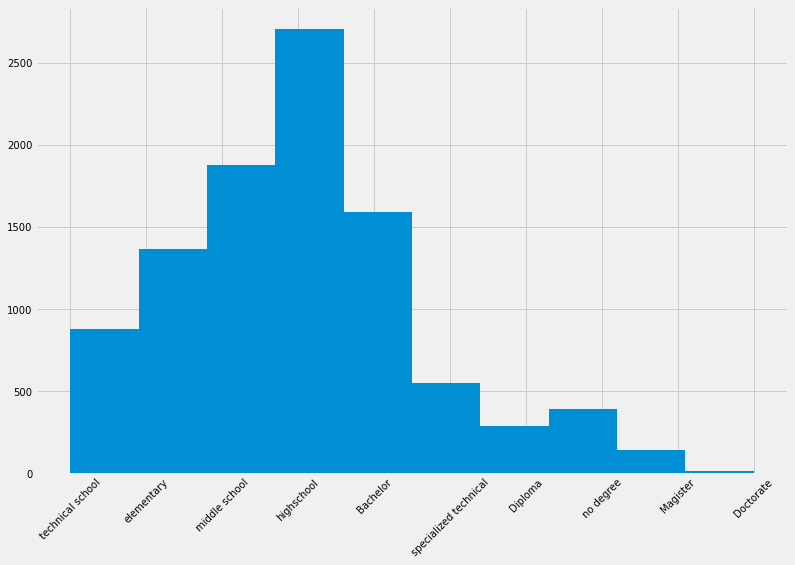

In [405]:
df_graph['Degree'].hist()
plt.xticks(rotation=45)

##### Surprisingly, more than 1800 people have middle school education and 1400 people have elementary school education which is very low compared to my expectations

#### Education status histogram

C:\Users\homepc\anaconda3\envs\intro-python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

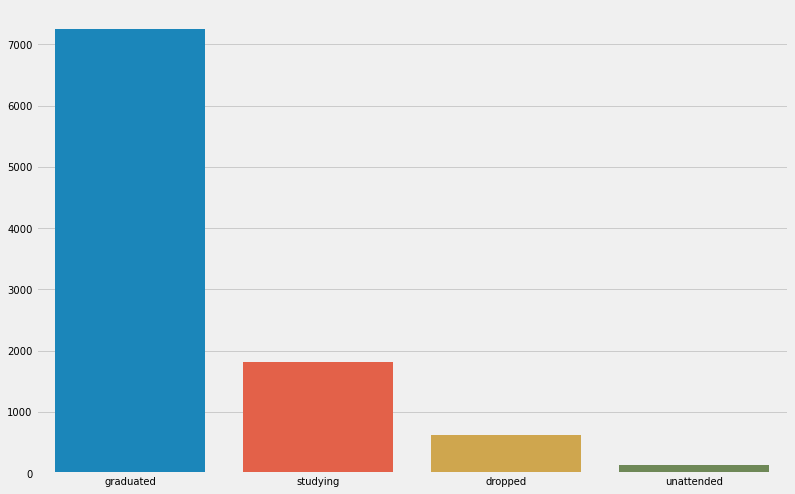

In [406]:
sns.barplot(df_graph['Education status'].value_counts().index, df_graph['Education status'].value_counts().values)

##### Most of the volunteers are graduated but more than 400 people dropped school which is unexpected

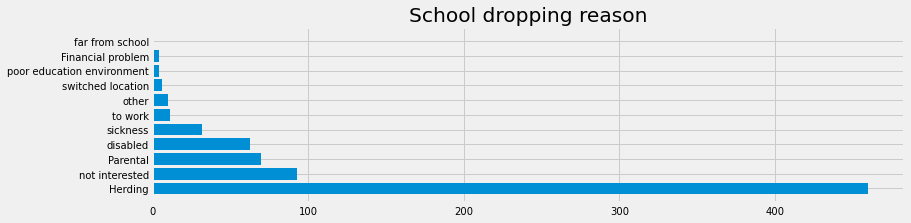

In [407]:
plt.figure(figsize=(12,3))
plt.barh(df_graph['Reason to drop'].value_counts().index, df_graph['Reason to drop'].value_counts().values)
plt.title('School dropping reason')
plt.show()

##### In mongolia, the reason why students drop out from school is mostly because of their parents who want them to be herder.

#### Moving onto the employment status

C:\Users\homepc\anaconda3\envs\intro-python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

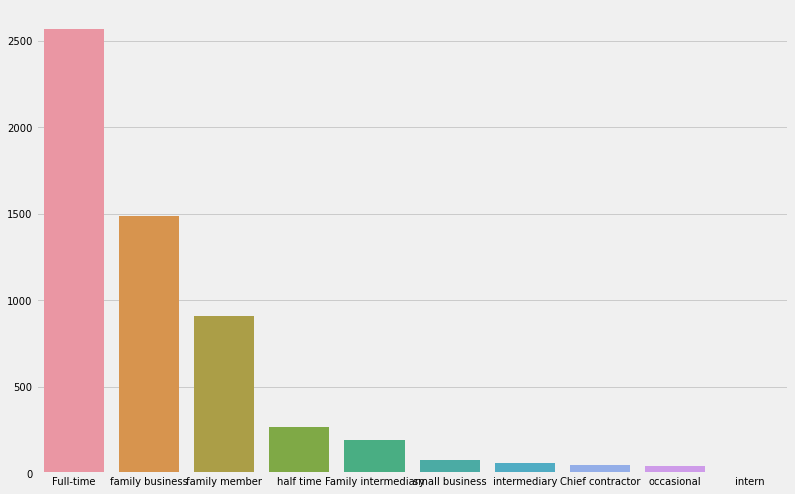

In [408]:
sns.barplot(df_graph['Employment status'].value_counts().index, df_graph['Employment status'].value_counts().values)

##### Family business number is very high compared to other type of businesses.

##### Original data was in 1000 tugriks unit. Thus, multiplied by 1000

In [409]:
df_graph['Main salary'] = 1000*df_graph['Main salary']
df['Main salary'] = 1000*df['Main salary']

##### Most of the salaries are below 3 million tugriks and some salaries are too high. Therefore, counted them as outliers.

In [410]:
df = df[df['Main salary'] < 3000000].replace(np.nan, 0)
df = df[df['Side salary'] < 3000000].replace(np.nan, 0)

#### salary histogram

array([[<AxesSubplot:title={'center':'Main salary'}>]], dtype=object)

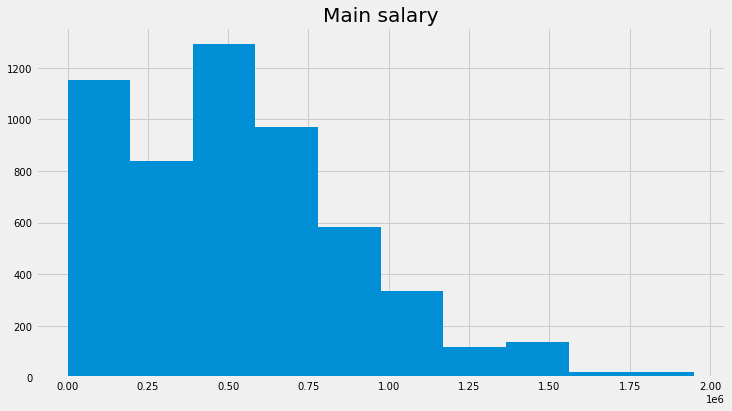

In [411]:
df_graph[df_graph['Main salary'] < 2000000].hist(column='Main salary', figsize=(11,6))

Text(0.5, 1.0, 'salary difference based on gender')

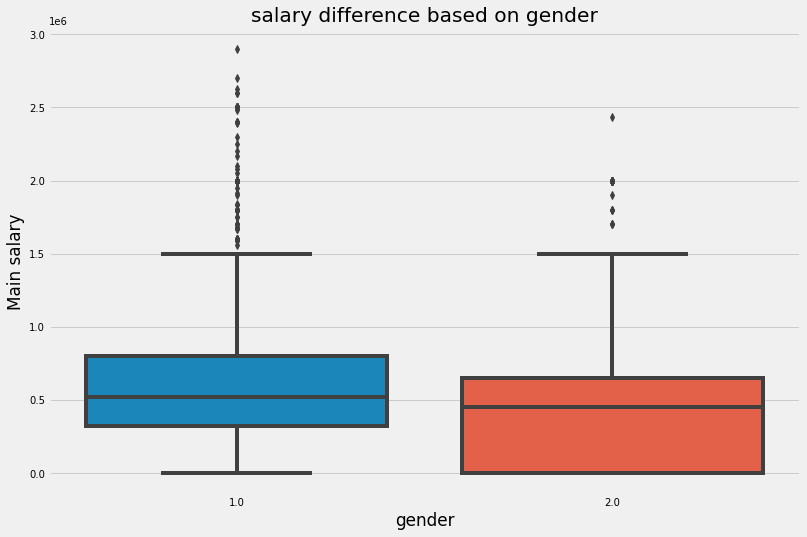

In [412]:
sns.boxplot(x="gender", y="Main salary", data=df)
plt.title('salary difference based on gender')

Gender code:
- 1: Male
- 2: Female

##### As a result it shows that average salary for men is higher while women have relatively equal distribution in salary.

#### Salary and workhour correlation

C:\Users\homepc\anaconda3\envs\intro-python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Main salary and workhours')

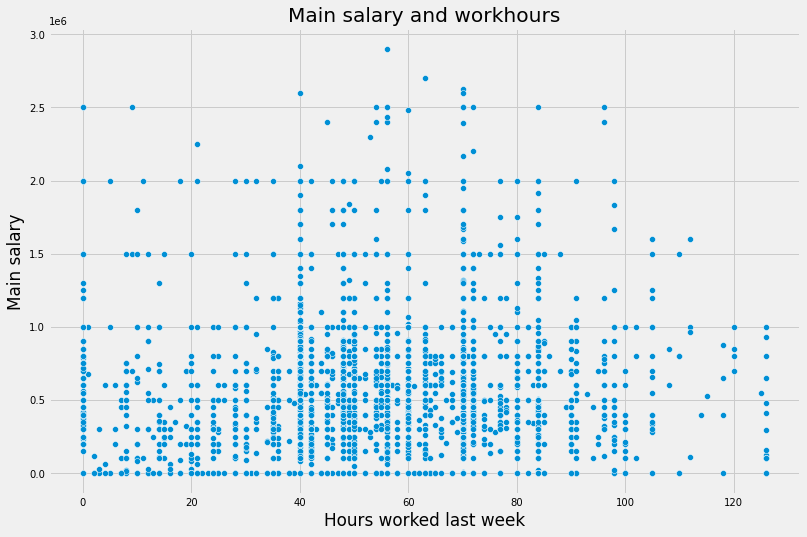

In [413]:
sns.scatterplot(df['Hours worked last week'],df['Main salary'])
plt.title('Main salary and workhours')

##### Side job worked hour don't have much correlation with salary. On the other hand, although there're some unrelated parts, working hour and main job salary are definitely correlated

Text(0.5, 1.0, 'Side salary and working hour')

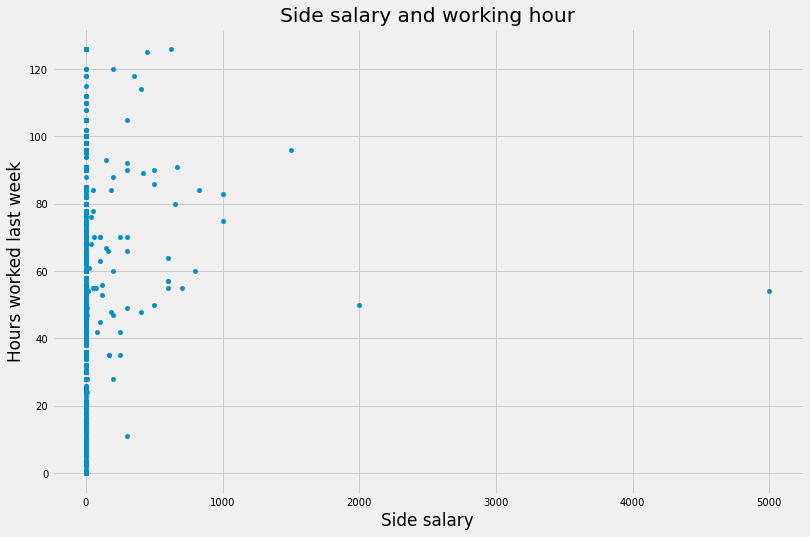

In [414]:
df_graph.plot(kind="scatter", x="Side salary", y="Hours worked last week")
plt.title('Side salary and working hour')

#### Phone and TV usage time relation

Text(0.5, 1.0, 'Phone and TV usage')

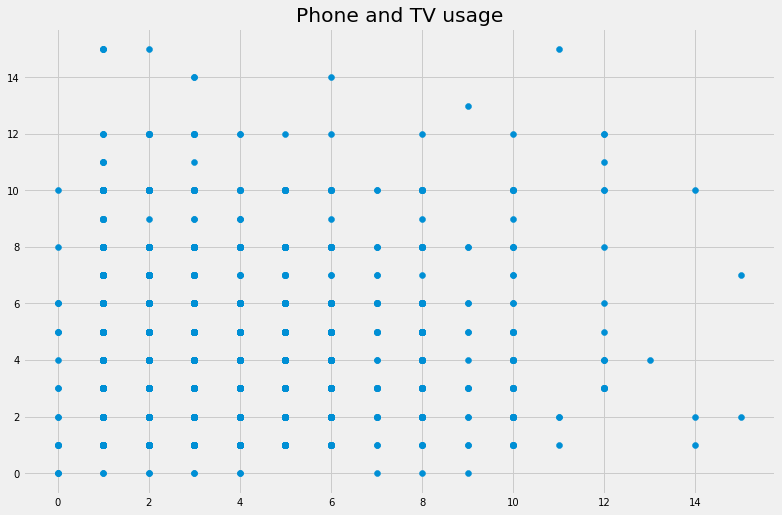

In [415]:
plt.scatter(df_graph['Phone usage'],df_graph['TV usage'])
plt.title('Phone and TV usage')

##### Watching TV doesn't mean that person use phone same and vice versa.

In [416]:
df_graph['Main salary'].isnull().sum()

7842

#### Phone and Tv Usage based on degree

Text(0.5, 1.0, 'Phone usage and degree')

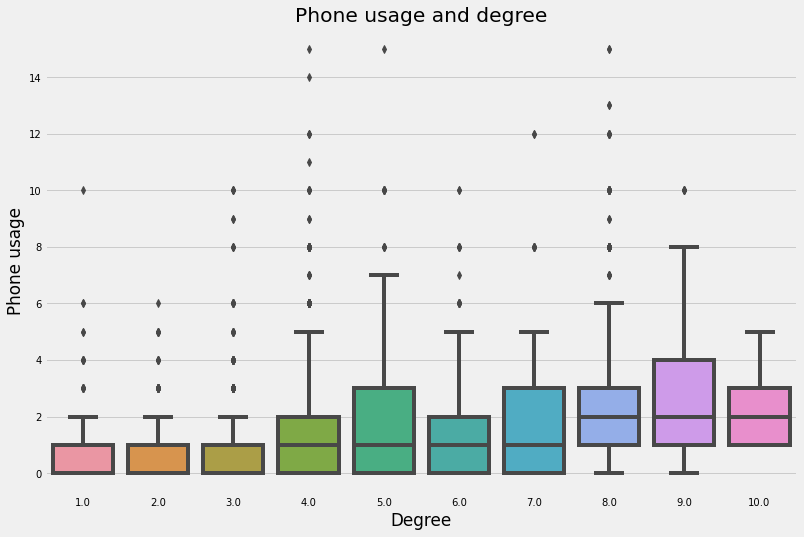

In [417]:
sns.boxplot(x="Degree", y="Phone usage", data=df)
plt.title('Phone usage and degree')

Degree code
- 1: no degree
- 2: elementary
- 3: middle school
- 4: highschool
- 5: technical
- 6: specialized technical
- 7: diploma
- 8: bachelor
- 9: magister
- 10: doctorate

##### From the graph, we can see that higher education people have higher median amount of time using phone in the past week

Text(0.5, 1.0, 'Degree and TV usage')

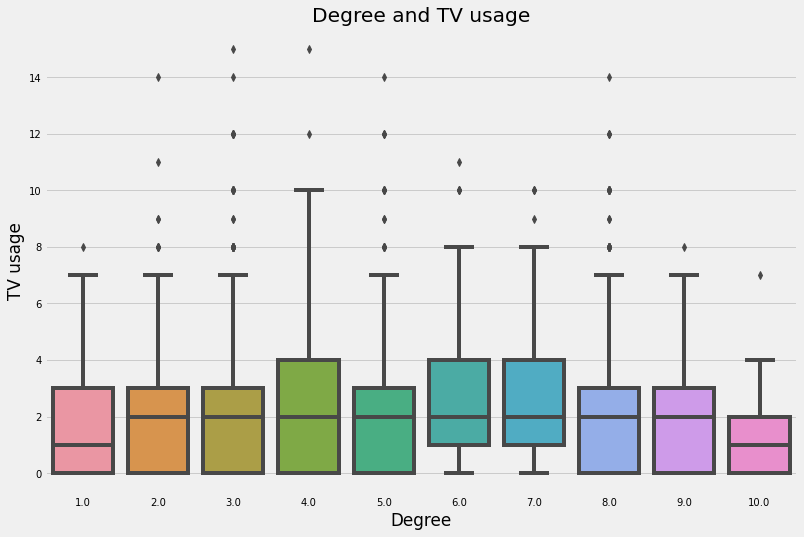

In [418]:
sns.boxplot(x="Degree", y="TV usage", data=df)
plt.title('Degree and TV usage')

##### Average of hours people used Tv is same for most degrees but doctorate and elementary school education people had lower median

### Handling nans

In [419]:
df.isnull().sum()

HL1                       0
Househead                 0
gender                    0
age                       0
TV usage                  0
Phone usage               0
Education status          0
Degree                    0
Hearing problem           0
Marital status            0
Employment status         0
Hours worked last week    0
Main salary               0
Side salary               0
dtype: int64

In [420]:
df.shape

(5575, 14)

In [421]:
df["Phone usage"].fillna(0, inplace=True)

In [422]:
df["TV usage"].fillna(0, inplace=True)

In [423]:
df = df.dropna()

In [424]:
df.shape

(5575, 14)

In [425]:
df.dtypes

HL1                       float64
Househead                 float64
gender                    float64
age                       float64
TV usage                  float64
Phone usage               float64
Education status          float64
Degree                    float64
Hearing problem           float64
Marital status            float64
Employment status         float64
Hours worked last week    float64
Main salary               float64
Side salary               float64
dtype: object

In [426]:
df = df.dropna()

In [427]:
df.shape

(5575, 14)

In [428]:
X = df.drop(columns=['Main salary','Side salary'])
y = df['Main salary']

#### Importing libraries

In [429]:
import sklearn
from sklearn import *
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [430]:
from sklearn.metrics import mean_squared_error

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot:>

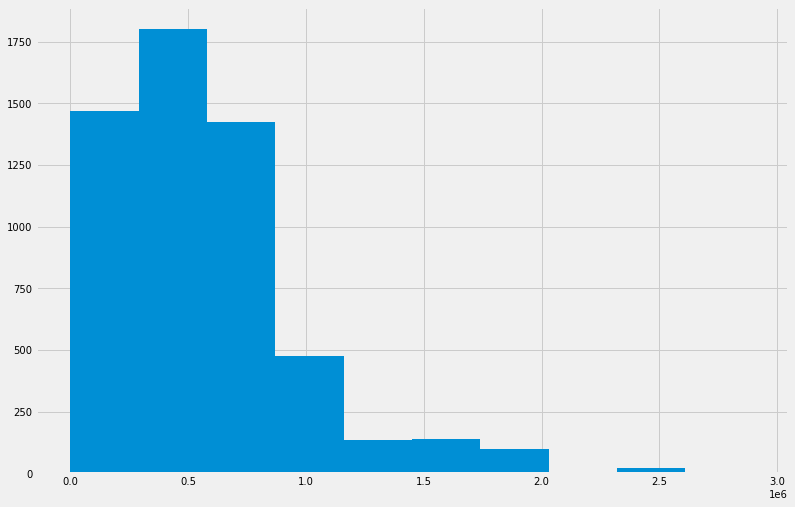

In [432]:
y.hist()

In [433]:
y.describe()

count      5575.00000
mean     536588.34081
std      430806.39631
min           0.00000
25%      250000.00000
50%      500000.00000
75%      750000.00000
max     2900000.00000
Name: Main salary, dtype: float64

##### STD: 430000 which determined our benchmark to be around 35000

#### Random tree regression

In [434]:
from sklearn.tree import DecisionTreeRegressor

In [435]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [436]:
salary_predictions = tree_reg.predict(X_test)
tree_rmse = mean_squared_error(y_test, salary_predictions, squared=False)
tree_rmse

482513.8526116453

#### Random Forest

In [437]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [438]:
random_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, random_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

351147.8112850127

In [439]:
y.describe()

count      5575.00000
mean     536588.34081
std      430806.39631
min           0.00000
25%      250000.00000
50%      500000.00000
75%      750000.00000
max     2900000.00000
Name: Main salary, dtype: float64

#### XG Boost

In [440]:
boost= xgb.XGBRegressor()

In [441]:
boost.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [442]:
boost_pred = boost.predict(X)

In [443]:
boost_mse = mean_squared_error(y, boost_pred)
boost_rmse = np.sqrt(boost_mse)
boost_rmse

220121.33392032792

#### SVM

In [444]:
from sklearn import svm

In [445]:
svm_reg = svm.SVR()

In [446]:
svm_reg.fit(X_train, y_train)

SVR()

In [447]:
svm_reg = svm_reg.predict(X_test)

In [448]:
svr_rmse = mean_squared_error(y_test, svm_reg, squared=False)
svr_rmse

443580.0393545441

#### Multi output regressor

In [449]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [450]:
reg = make_pipeline(StandardScaler(),
...                     SGDRegressor(max_iter=1000, tol=1e-3))

In [451]:
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [452]:
sgd_reg = reg.predict(X_test)

In [453]:
sgd_rmse = mean_squared_error(y_test, sgd_reg, squared=False)
sgd_rmse

369803.95673040196

##### Finished with Main salary prediction, moving onto side job salary prediction

### Side job salary prediction

In [454]:
X1 = df.drop(columns=['Main salary','Side salary'])
y1 = df['Side salary']

In [455]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [459]:
y1.describe()

count   5575.00000
mean       4.76143
std       85.15117
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max     5000.00000
Name: Side salary, dtype: float64

In [470]:
y1[y1 == 0].count().sum()

5504

##### Almost all the values are 0 for side job salary

In [456]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [457]:
random_predictions1 = forest_reg.predict(X_test)
forest_mse1 = mean_squared_error(y_test, random_predictions1)
forest_rmse1 = np.sqrt(forest_mse1)
forest_rmse1

72.67801664223735

##### Side salary data is too small that we can't make machine learning model

# Conclusion

For predicting side job salary, the data was insufficient to make a machine learning model.  As for the main job salary prediction attempt, after trying out several regression models, xg boost and random forest had the best rmse scores so far, STD at 430000 and XG boost rmse: 220000, Random forest rmse: 350000. Therefore, main job salary can be predicted from the usage of time, type of business, education degree and gender with decent accuracy. With correct survey, people can know salary expectations and range. With more accurate data including industry of the job, this problem will be completed and can be used in real life.